<img src='img9/1.jpg' width='40%' />

# 9.1  时序数据概述
## 9.1.1  时序数据特性

1) 趋势性

    •	时间序列在长时间内所呈现出来的行为，指受某种根本性因素影响而产生的变动或缓慢的运动

2) 循环性

    •	指时间序列的变动有规律地徘徊于趋势线上下并反复出现

3) 季节性

    •	一年内随季节变换而发生的有规律的周期性变化，比如流感季，但更小单位的周期变动也被看成季节成分，如日交通流量反映了一天内“季节”变化情况

4) 波动性

    •	围绕前3个要素的随机性波动，是一种无规律可循的变动


## 9.1.2  时序数据特征的提取
（1）基于统计方法的特征提取

    • 提取数据波形的均值、方差、极值、波段、功率谱、过零率（过零率（Zero Crossing Rate，ZCR）是指在每帧中，语音信号通过零点（从正变为负或从负变为正）的次数）等统计特征，代替原时序数据作为特征向量
    
（2）基于模型的特征提取

    • 用模型去刻画时间序列数据，然后提取模型的系数作为特征向量
    
（3）基于变换的特征提取

    • 通过变换使数据的特性突显出来，以便提取
    • 主要有时频变换和线性变换，如快速傅里叶变换、小波变换和主成分分析等
    
（4）基于分形理论（Fractal Theory）的特征提取

    • 分形是指具有无限精细、非常不规则、无穷自相似的结构
    • 在大自然中，海岸线、雪花、云雾这些不规则形体都属于分形，即部分与整体有自相似性，可提取分维数作为 特征参数

例8-1：绘制股票收盘价的时序图，并提取该时序数据的常用特征值。
<img src='img9/2.jpg' width='80%' />

In [2]:
import pandas as pd
# 设置usecols，从文件中只读取指定列
data = pd.read_csv('data/stockPrice.csv', usecols=[0,1], index_col=0)
print(data.describe())
print(data[:5])

            close
count  249.000000
mean   150.827892
std     14.347368
min    116.610000
25%    142.270000
50%    152.760000
75%    159.860000
max    176.420000
            close
date             
2017/1/5   116.61
2017/1/6   117.91
2017/1/9   118.99
2017/1/10  119.11
2017/1/11  119.75


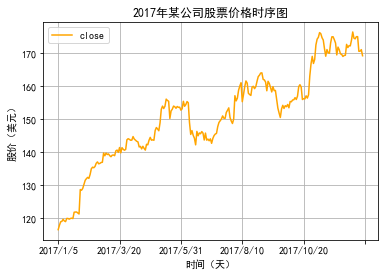

In [4]:
import matplotlib.pyplot as plt
# 绘制时序图，并添加图元
plt.rcParams['font.sans-serif'] = ['SimHei'] # 不加这一句中文标题显示异常
data.plot(title='2017年某公司股票价格时序图', grid=True, color='#FFA500') 
plt.xlabel('时间（天）')
plt.ylabel('股价（美元）')
plt.show()

# 9.2  时序数据分析方法
## 9.2.1  时序数据分析过程
### 9.2.1.1 时序分析模型的类别
时序分析模型的类别
<img src='img9/3.jpg' width='80%' />

### 9.2.1.2 线性模型
时序数据分析过程
<img src='img9/4.jpg' width='60%' />

### 9.2.1.3 神经网络模型
RNN、LSTM、GRU等
<img src='img9/5.jpg' width='60%' />


## 9.2.2  温度预测实例

基于前五天的气温预测未来24小时后的温度。文件中每小时有6条数据集；

训练集：前五天的气温 5 * 24 * 6 = 720 条数据

测试集：第六天后的气温 6 * 24 + 1 = 145 条数据

即利用前720条数据预测其后面的第145条数据
<img src='img9/8.jpg' width='80%' />

1. 读取文件

In [1]:
import pandas as pd
import numpy as np

filename = 'data/jena_climate_2009_2016.csv'
data = pd.read_csv(filename)
data.head()      # 取前五条数据
# data.sample(5) # 随机取五条数据
# data.tail()    # 取后五条数据

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


2. 用前十天的温度绘制时序图

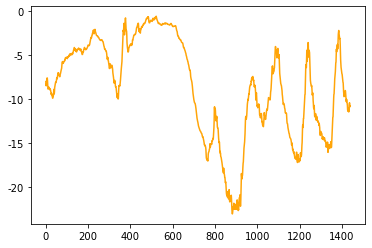

In [2]:
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus']=False # 设置负号正常显示，不然会乱码

temp = data["T (degC)"]
temp_10days = temp[:1440] # 前10天共有1440个数据点
temp_10days.plot(color='#FFA509')
plt.show()

3. 数据预处理

In [3]:
# 删除日期列
data_process = data.drop('Date Time',axis = 1)

# 数据标准化
from sklearn import preprocessing
data_process = preprocessing.scale(data_process)
# data_process.dtype
data_process.shape

(420551, 14)

4. 随机从序列中选择5000个子序列，每个子序列长度为721，构造样本数据集

In [4]:
import numpy as np
samples = 5000 # 自己设定的
lookback = 5 * 24 * 6 # 720个数据点

# X为3D数组，形状（samples, input_length, input_dim）
# samples表示样本数，input_length = lookback, input_dim = 14
# y为1D数组，形状（samples），温度值
# 初始化X和y，X (5000, 720, 14)
X = np.zeros((samples, lookback, data_process.shape[-1]))
y = np.zeros((samples,))
print(X.shape, y.shape)

# 随机选取5000个时刻
delay = 24 * 6 # 24小时后，144个时刻
min_index = lookback # 720
max_index = len(data_process)-delay-1 # 420551-144-1

# 生成5000个样本起始时刻值
rows = np.random.randint(min_index, max_index, size=samples)

# 转换下数据类型不然下面取iloc会报错
data_process = pd.DataFrame(data_process)

# 提取5000个时刻对应的子序列数据，生成X和y
for j, row in enumerate(rows):
    indices = np.arange(row - lookback, row)
    X[j] = data_process.iloc[indices,:]
    y[j] = data_process.loc[row + delay,1] 
    # 等价于课本上的：y[j] = data_process.iloc[row + delay,:][1] 


(5000, 720, 14) (5000,)


<img src='img9/8.jpg' width='80%' />

（插入）关于enumerate的用法：
enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标


In [13]:
d = ['spring', 'summer', 'autumn', 'winter']
print('不使用enumerate: ')
for i in d:
    print(i)
    
print('_ __ __ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ ')

print('\n使用enumerate: ')
for i in enumerate(d):
    print(i)

不使用enumerate: 
spring
summer
autumn
winter
_ __ __ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ 

使用enumerate: 
(0, 'spring')
(1, 'summer')
(2, 'autumn')
(3, 'winter')


5. 构建基于LSTM的神经网络模型，并编译

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()

# LSTM输出维度为32，也就是将输入14维的特征转换为32维的特征。
# 模型只使用一层LSTM，只需要返回最后结点的输出
# X.shape[-1]是最后轴的维度大小14
model.add(LSTM(32, input_shape=(None, X.shape[-1])))
# model.add(LSTM(32))
model.add(Dense(1))

from tensorflow.keras.optimizers import RMSprop
# 损失函数为平均绝对误差（MAE）
model.compile(optimizer=RMSprop(), loss='mae', metrics='accuracy')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                6016      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,049
Trainable params: 6,049
Non-trainable params: 0
_________________________________________________________________


6. 训练神经网络

In [7]:
history = model.fit(X, y, 
          epochs=10, 
          batch_size=128, 
          verbose=1, # verbose: 0, 1 或 2。日志显示模式。 0 = 安静模式, 1 = 进度条, 2 = 每轮一行。
          validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 15s 404ms/step - loss: 0.3967 - accuracy: 0.0000e+00 - val_loss: 0.3080 - val_accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 12s 367ms/step - loss: 0.3069 - accuracy: 0.0000e+00 - val_loss: 0.3002 - val_accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 12s 388ms/step - loss: 0.2981 - accuracy: 0.0000e+00 - val_loss: 0.2932 - val_accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 12s 363ms/step - loss: 0.2959 - accuracy: 0.0000e+00 - val_loss: 0.2903 - val_accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 11s 356ms/step - loss: 0.2945 - accuracy: 0.0000e+00 - val_loss: 0.2863 - val_accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 16s 513ms/step - loss: 0.2918 - accuracy: 0.0000e+00 - val_loss: 0.2865 - val_accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 13s 400ms/step - loss: 0.2910 - accuracy: 

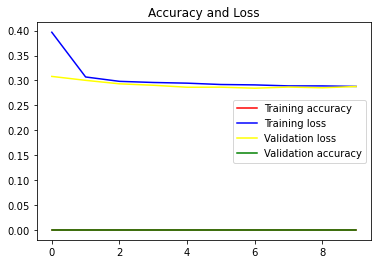

In [8]:
model.save('tempDu.h5')

acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))
plt.title('Accuracy and Loss')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'yellow', label='Validation loss')
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')

plt.legend()
plt.show()


# 9.3  语音识别技术

## 9.3.1  语音识别技术简介

1. 语音数据采样

    按照一定时间间隔△t在模拟信号x(t)上逐点采取其瞬时值；
    采样频率：指每秒钟取得声音样本的次数；
    一般而言，采样频率越高，采样点数就越密，所得离散信号就越逼近于原信号；
    常用的采样率是8k(8000），16k，44.1k，48k；
    
2. 语音识别技术基本框架

<img src='img9/6.jpg' width='60%' />


## 9.3.2  语音识别中的时序数据处理

预处理 ：降噪和语音断点检测

1. 分帧

    把将语音切割成按时间顺序排列、等长的语音段，每一段称为一帧
    通常相邻的语音帧之间是有交叠的
    

2. 特征提取

    由于波形在时域上的描述能力非常有限，需要对这些语音帧进行变换，以提取较容易识别的声学特征
    最常用的特征是梅尔倒谱系数MFCC（Mel-Frequencey Cepstral Coefficient）
    
    
3. 语音识别

    • 采用音素作为识别单元

    • 音素是构成单词发音的基本单位
    
    • 语言模式识别的过程就是把语帧识别成对应的状态，把状态映射到音素，把音素映射到单调。其中最困难、最关键的问题是如何识别每一帧所对应的状态。应用声学模型，HMM，统计模型可计算每一帧属于某一状态的概率。


## 9.3.3  语音识别的实例

百度语音开放平台为用户提供免费的语音识别和语音合成服务的工具包：baidu-aip

首先注册百度账号，然后安装

然后调用

<img src='img9/7.jpg' width='80%' />


应用链接：https://ai.baidu.com/tech/speech


关于下文的文件读取模式链接：https://blog.csdn.net/ztf312/article/details/47259805

In [20]:
from aip import AipSpeech #导入语音识别包
def get_file_content(file_name):
    with open(file_name, 'rb') as fp: # rb 二进制读取模式打开文件
        return fp.read()


In [22]:
APP_ID = '25751645'
API_KEY = 'OLWQqY1OsYD8Plh1rDXp2Fh5'  
SECRET_KEY = 'ZQPC8mrS65GKWbLBAkgF4dEGMgsr5hQ2'

aipSpeech = AipSpeech(APP_ID, API_KEY, SECRET_KEY)# 初始化识别模型

file_name='data/voice.wav' # 语音文件

result = aipSpeech.asr(get_file_content(file_name),
                       'wav', # 文件格式，即后缀名，文件后缀 pcm/wav/amr/m4a 格式
                       16000, # 采样率
                       {'dev_ip': '1536'})#  1537 表示识别普通话，使用输入法模型。
print (result['result'][0])


数据智能分析技术。
